# Image Captioning Demo

I am not author of the Python scripts used in this notebook!

Most of them come from the GitHub repository: 
https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Image-Captioning

## List of dependences. 

In [1]:
!pip freeze

attrs==19.3.0
backcall==0.1.0
bleach==3.1.0
cycler==0.10.0
decorator==4.4.1
defusedxml==0.6.0
entrypoints==0.3
imageio==2.6.1
importlib-metadata==1.4.0
imread==0.7.1
ipykernel==5.1.3
ipython==7.11.1
ipython-genutils==0.2.0
ipywidgets==7.5.1
jedi==0.15.2
Jinja2==2.10.3
jsonschema==3.2.0
jupyter==1.0.0
jupyter-client==5.3.4
jupyter-console==6.0.0
jupyter-core==4.6.1
kiwisolver==1.1.0
MarkupSafe==1.1.1
matplotlib==3.1.2
mistune==0.8.4
more-itertools==8.1.0
nbconvert==5.6.1
nbformat==5.0.3
networkx==2.4
notebook==6.0.2
numpy==1.18.1
pandocfilters==1.4.2
parso==0.5.2
pexpect==4.7.0
pickleshare==0.7.5
Pillow==6.1.0
pkg-resources==0.0.0
prometheus-client==0.7.1
prompt-toolkit==2.0.10
ptyprocess==0.6.0
Pygments==2.5.2
pyparsing==2.4.6
pyrsistent==0.15.7
python-dateutil==2.8.1
PyWavelets==1.1.1
pyzmq==18.1.1
qtconsole==4.6.0
scikit-image==0.16.2
scipy==1.1.0
Send2Trash==1.5.0
six==1.13.0
terminado==0.8.3
testpath==0.4.4
torch==0.4.1
torchvision==0.1.9
tornado==6.0.3
traitlets==4.3.3
wcwidth==0.

## Loading stuff

In [2]:
from caption import *

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 10]

In [3]:
%%capture

args_model = "pretrained/BEST_checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar"
args_word_map = "pretrained/WORDMAP_coco_5_cap_per_img_5_min_word_freq.json"
args_beam_size = 5
args_smooth = "smooth"

# Load model
checkpoint = torch.load(args_model, map_location=str(device))
decoder = checkpoint['decoder']
decoder = decoder.to(device)
decoder.eval()
encoder = checkpoint['encoder']
encoder = encoder.to(device)
encoder.eval()

# Load word map (word2ix)
with open(args_word_map, 'r') as j:
    word_map = json.load(j)
rev_word_map = {v: k for k, v in word_map.items()}  # ix2word

In [4]:
def ic(args_img):
    
    # Encode, decode with attention and beam search
    seq, alphas = caption_image_beam_search(encoder, decoder, args_img, word_map, args_beam_size)
    alphas = torch.FloatTensor(alphas)

    # Visualize caption and attention of best sequence
    visualize_att(args_img, seq, alphas, rev_word_map, args_smooth)

## Captions generation! 

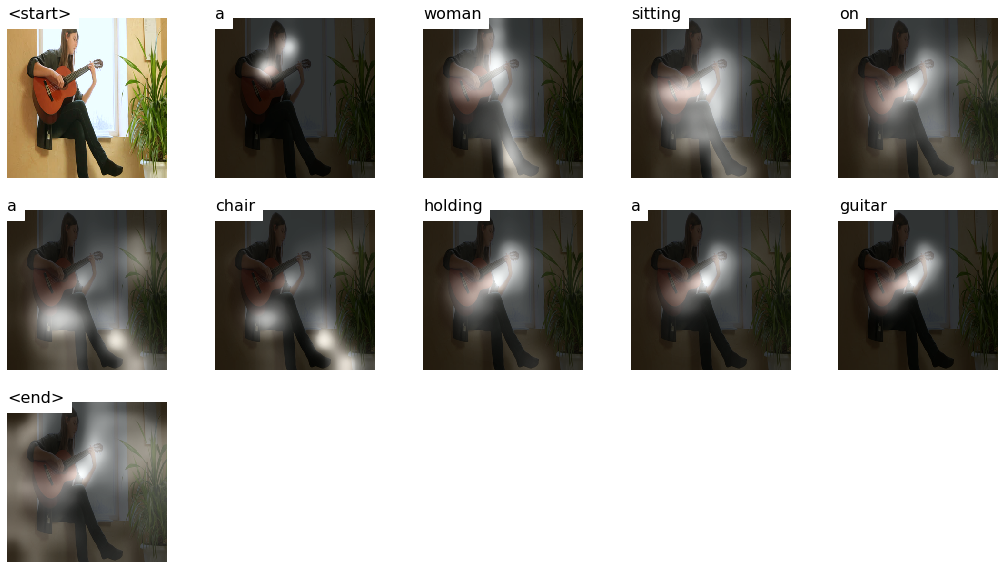

In [5]:
# https://www.shutterstock.com/it/video/clip-3358688-teen-girl-playing-guitar
ic("images/guitar.jpg")

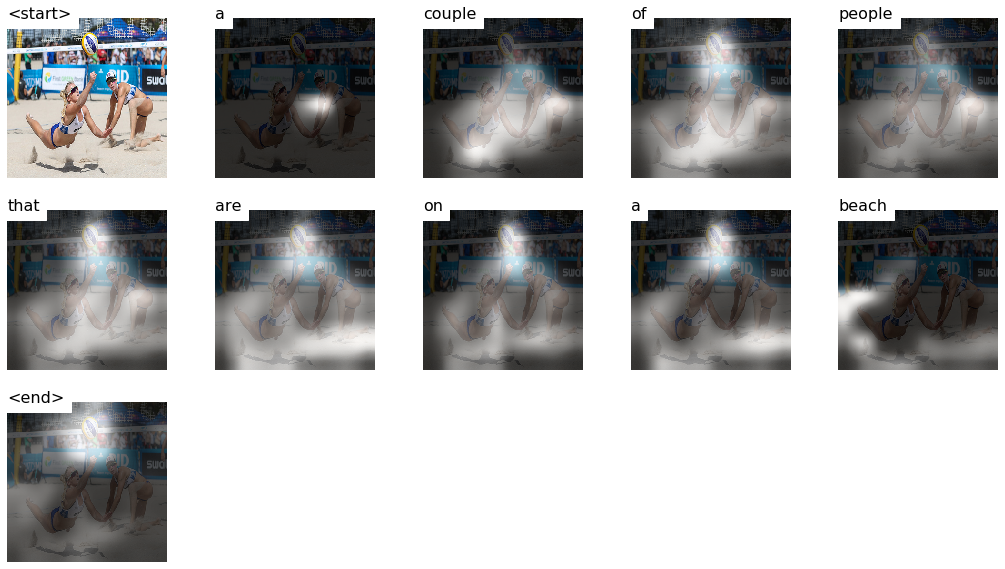

In [6]:
# https://www.wallpaperflare.com/sand-sunglasses-technique-beach-volleyball-wallpaper-hggcp
ic("images/beachvolley.jpg")

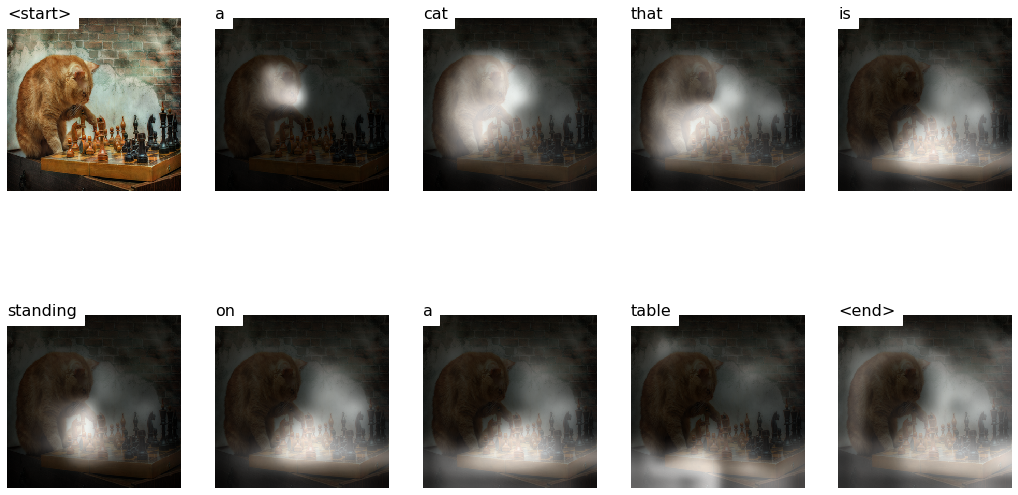

In [7]:
# https://wall.alphacoders.com/big.php?i=991329&lang=Italian
ic("images/cat.jpg")

In [ ]:
# https://wallpaperscraft.com/download/board_game_chess_party_figures_black_white_8820/1600x1200
ic("images/chessboard.jpg")

In [ ]:
# https://www.ilbaluardobedandbreakfast.it/
ic("images/breakfast.jpg")